# Зээлийн өгөгдлийн ангиллын анализ

Энэхүү дүн шинжилгээнд бид `loan_data.csv` файлыг ашиглан зээлийн хэмжээгээр (`Amount`) өндөр эсэхийг ангиллын аргаар тодорхойлж, олон төрлийн ангиллын загваруудыг туршина.

**Алхамууд:**
1. Өгөгдөл унших  
2. Анхан шатны дүн шинжилгээ (EDA)  
3. Ангиллын зорилго (`HighAmount`) үүсгэх  
4. Өгөгдөл бэлтгэл (Шимт цэгшүүлэлт, хуваалт)  
5. Моделийн сургалт (LogisticRegression, DecisionTree, RandomForest, KNN, SVM, NaiveBayes)  
6. Үр дүнг үнэлэх (accuracy, precision, recall, f1, ROC AUC)  


In [ ]:
# 1. Шаардлагатай сангуудыг импортлох
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report


In [ ]:
# 2. Өгөгдлийг унших
df = pd.read_csv('/content/loan_data.csv')
df.head()

,LoanID,CustomerID,Amount,InterestRate,LoanDate,TermMonths
0,1,115795,14160.61,15.65,2024-10-10,12
1,2,100860,36431.40,11.60,2024-04-30,60
2,3,176820,8808.68,19.76,2020-11-12,60
3,4,154886,41157.59,10.85,2021-10-21,60
4,5,106265,30985.18,8.23,2023-04-08,12


In [ ]:
# 3. Ангиллын зорилго үүсгэх:
# 'HighAmount' = Amount > median(Amount)
median_amount = df['Amount'].median()
df['HighAmount'] = (df['Amount'] > median_amount).astype(int)
df['HighAmount'].value_counts()

,count
HighAmount,
0,50000
1,50000


In [ ]:
# 4. Өгөгдөл бэлтгэл:
# Шаардлагатай шинж чанарыг сонгох
features = ['InterestRate', 'TermMonths']
X = df[features]
y = df['HighAmount']

# Мэдээллийг сургалт, шалгалтын бүлэгт хуваах
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Шимт (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 5. Моделүүдийг тодорхойлох ба сургалт (бүх модельд нэгэн үйлдэлтэйгээр)
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'Naive Bayes': GaussianNB()
}

results = []

for name, model in models.items():
    # Сургалт
    model.fit(X_train_scaled, y_train)
    # Таамаглал
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    # Үнэлгээ
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    })

# DataFrame болгон харуулах
results_df = pd.DataFrame(results).sort_values(by='ROC AUC', ascending=False)
results_df

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,0.504200,0.504188,0.505600,0.504893,0.501256
4,Support Vector Machine,0.500300,0.500259,0.580200,0.537272,0.500000
5,Naive Bayes,0.500733,0.500627,0.585200,0.539620,0.499328
3,K-Nearest Neighbors,0.495033,0.494975,0.489200,0.492070,0.495583
1,Decision Tree,0.496667,0.496125,0.426733,0.458820,0.495353
2,Random Forest,0.497533,0.497567,0.504533,0.501026,0.494986


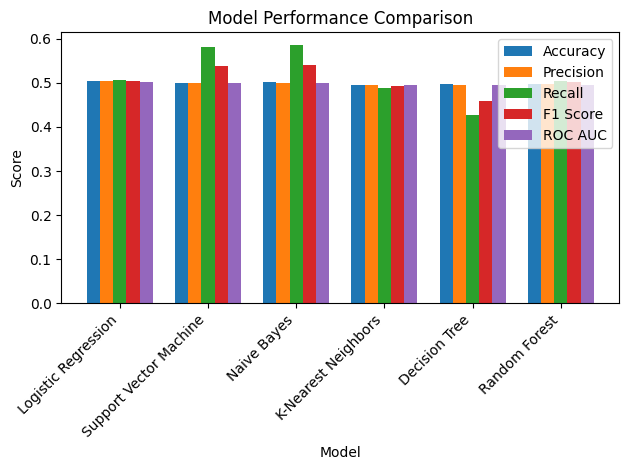

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
model_names = results_df['Model'].tolist()

x = np.arange(len(model_names))
width = 0.15

plt.figure()
for i, metric in enumerate(metrics):
    plt.bar(x + i*width, results_df[metric], width, label=metric)

plt.xticks(x + width*2, model_names, rotation=45, ha='right')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend()
plt.tight_layout()

plt.show()


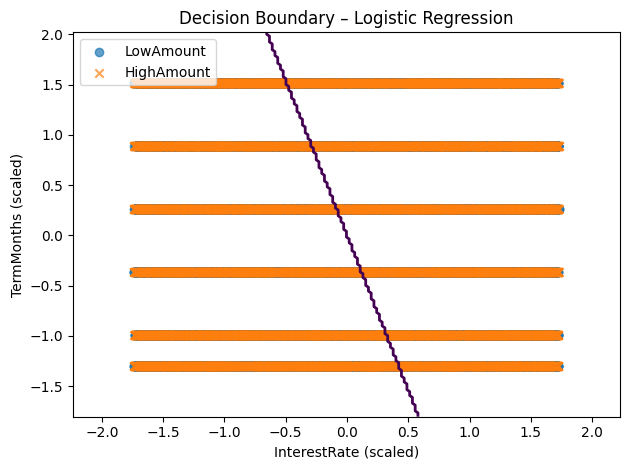

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# 1. Логистик регрессийн модель бэлдэх
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# 2. Meshgrid үүсгэх
x_min, x_max = X_train_scaled[:, 0].min() - 0.5, X_train_scaled[:, 0].max() + 0.5
y_min, y_max = X_train_scaled[:, 1].min() - 0.5, X_train_scaled[:, 1].max() + 0.5
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

grid = np.c_[xx.ravel(), yy.ravel()]
Z = logreg.predict(grid).reshape(xx.shape)

# 4. Статик график зурах
plt.figure()
plt.contour(xx, yy, Z, levels=[0.5], linewidths=2)  # шийдлийн хил
plt.scatter(X_test_scaled[y_test==0, 0], X_test_scaled[y_test==0, 1], label='LowAmount', alpha=0.7)
plt.scatter(X_test_scaled[y_test==1, 0], X_test_scaled[y_test==1, 1], label='HighAmount', marker='x', alpha=0.7)
plt.xlabel('InterestRate (scaled)')
plt.ylabel('TermMonths (scaled)')
plt.title('Decision Boundary – Logistic Regression')
plt.legend()
plt.tight_layout()
plt.show()


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_curve, average_precision_score




In [12]:
# 1. Өгөгдөл унших ба бэлтгэл
df = pd.read_csv('/content/loan_data.csv')
df['HighAmount'] = (df['Amount'] > df['Amount'].median()).astype(int)
X = df[['InterestRate', 'TermMonths']]
y = df['HighAmount']



In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [14]:
# 2. Моделийн Precision-Recall Curve залах
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True, random_state=42),
    'Naive Bayes': GaussianNB()
}


In [ ]:

plt.figure()
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    ap = average_precision_score(y_test, y_proba)
    plt.plot(recall, precision, label=f'{name} (AP = {ap:.2f})')

plt.title('Precision-Recall Curves for All Models')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/content/loan_data.csv')
df['HighAmount'] = (df['Amount'] > df['Amount'].median()).astype(int)



In [ ]:
# 2. Correlation matrix үүсгэж, зурах
corr_features = ['Amount', 'InterestRate', 'TermMonths', 'HighAmount']
corr_matrix = df[corr_features].corr()

plt.figure()
plt.imshow(corr_matrix, interpolation='nearest')
plt.title('Correlation Matrix')
plt.xticks(np.arange(len(corr_features)), corr_features, rotation=45, ha='right')
plt.yticks(np.arange(len(corr_features)), corr_features)
for i in range(len(corr_features)):
    for j in range(len(corr_features)):
        plt.text(j, i, f"{corr_matrix.iat[i, j]:.2f}", ha='center', va='center')
plt.tight_layout()
plt.show()


In [ ]:

features = ['InterestRate', 'TermMonths']
X = df[features]
y = df['HighAmount']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train_scaled, y_train)

plt.figure(figsize=(10, 6))
plot_tree(
    dt,
    feature_names=features,
    class_names=['LowAmount', 'HighAmount'],
    filled=False,
    rounded=True,
    precision=2,
    proportion=True
)
plt.title('Decision Tree Diagram (max_depth=4)')
plt.tight_layout()
plt.show()
